
--- Epoca: 1 ---
_Iteracion:  1 _
num1:  0 num2:  0
w11:  0.05 w21:  0.2
z1: 0.3
w21:  0.1 w22:  0.2
z2: 0.15
y: 0.7200988230374544
Pesos actualizados
w11_new: 0.05 w21_new: 0.2 b1_new: -0.09353150273901417
w12_new: 0.1 w22_new: 0.2 b2_new: -0.2704924542209751
v1_new: 0.24945675909302617 v2_new: 0.3719515144483195 b3_new: -0.36004941151872716
_Iteracion:  2 _
num1:  0 num2:  1
w11:  0.05 w21:  0.2
z1: 0.10646849726098584
w21:  0.1 w22:  0.2
z2: -0.07049245422097511
y: -0.35976645786318023
Pesos actualizados
w11_new: 0.05 w21_new: 0.36769337827853354 b1_new: 0.07416187553951939
w12_new: 0.1 w22_new: 0.45163112224099866 b2_new: -0.01886133197997647
v1_new: 0.3215706272503905 v2_new: 0.3241041050416845 b3_new: 0.319833817412863
_Iteracion:  3 _
num1:  1 num2:  0
w11:  0.05 w21:  0.36769337827853354
z1: 0.12416187553951939
w21:  0.1 w22:  0.45163112224099866
z2: 0.08113866802002354
y: 0.38579653160327243
No actualizo pesos, ni bias
_Iteracion:  4 _
num1:  1 num2:  1
w11:  0.05 w21:  0.367

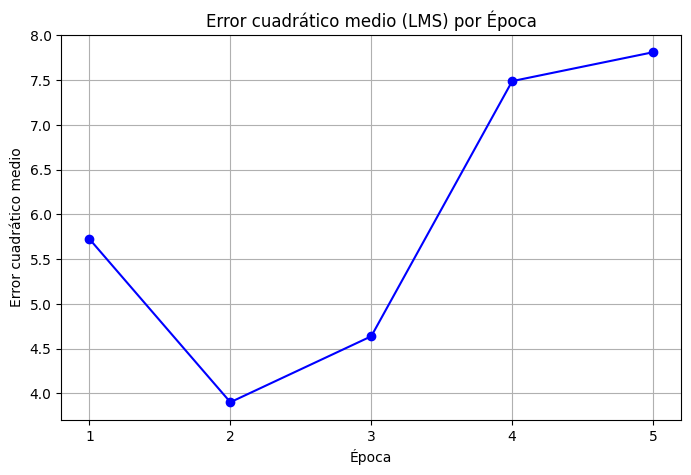

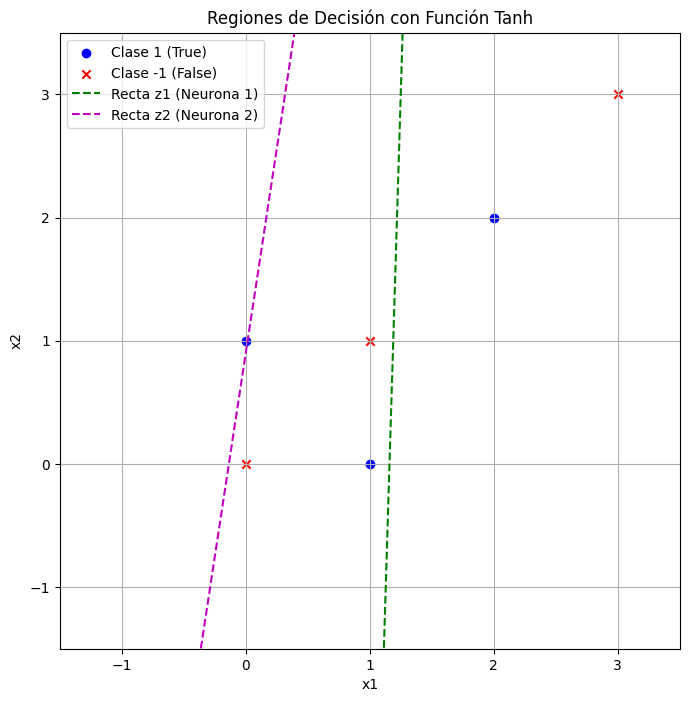

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de entrada (compuerta XOR modificada)
individuo = np.array([[0, 0],      # Clase -1 (False)
                      [0, 1],      # Clase -1 (False)
                      [1, 0],      # Clase -1 (False)
                      [1, 1],      # Clase 1 (True)
                      [2, 2],      # Clase 1 (True)
                      [3, 3],      # Clase 1 (True)
                              ])
                # 1 : true    -1 : false
clases = np.array([-1, 1, 1, -1 ,1 ,-1])

# Función de activación Tanh
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

# Derivada de Tanh
def tanh_derivada(x):
    return 1 - tanh(x)**2

# Parámetros iniciales
w = np.array([[0.05, 0.1], 
              [0.2,  0.2]])
v = np.array([[0.5], 
              [0.5]])
b1 = 0.3
b2 = 0.15
b3 = 0.5
pa = 0.5  # Tasa de aprendizaje
numEpocas = 5

# Variables para el entrenamiento
epocas = 0
sumaErrores = 0
error = []
aciertos = []

# Entrenamiento
while epocas != numEpocas:   
    print("\n--- Epoca:", epocas+1, "---")
    for i in range(individuo.shape[0]):
        print("_Iteracion: ", i + 1,"_")
        print("num1: ", individuo[i, 0], "num2: ", individuo[i, 1])
        print("w11: ", w[0, 0], "w21: ", w[1, 0])
        
        # Cálculo de z1 y z2
        z1 = (w[0,0] * individuo[i, 0] + w[1, 0] * individuo[i, 1]) + b1
        print("z1:", z1)
        print("w21: ", w[0, 1], "w22: ", w[1,1])
        z2 = (w[0, 1] * individuo[i, 0] + w[1,1] * individuo[i, 1]) + b2
        print("z2:", z2)
        
        # Cálculo de la salida y usando Tanh
        y = tanh(z1)*v[0, 0] + tanh(z2)*v[1, 0] + b3
        print("y:", y)
        
        # Predicción
        prediccion = 1 if y >= 0 else -1
        
        if prediccion == clases[i]:
            print("No actualizo pesos, ni bias")
        else: 
            # Cálculo del error
            error_iteracion = (clases[i] - y) ** 2 / 2
            sumaErrores += error_iteracion
            
            # Retropropagación
            delta_y = clases[i] - y
            delta_z1 = delta_y * v[0, 0] * tanh_derivada(z1)
            delta_z2 = delta_y * v[1, 0] * tanh_derivada(z2)
            
            # Actualización de pesos y bias
            w[0, 0] += pa * delta_z1 * individuo[i, 0]
            w[1, 0] += pa * delta_z1 * individuo[i, 1]
            b1 += pa * delta_z1
            
            w[0, 1] += pa * delta_z2 * individuo[i, 0]
            w[1, 1] += pa * delta_z2 * individuo[i, 1]
            b2 += pa * delta_z2
            
            v[0, 0] += pa * delta_y * tanh(z1)
            v[1, 0] += pa * delta_y * tanh(z2)
            b3 += pa * delta_y
            
            print("Pesos actualizados")
            print("w11_new:", w[0, 0], "w21_new:", w[1, 0], "b1_new:", b1)
            print("w12_new:", w[0, 1], "w22_new:", w[1, 1], "b2_new:", b2)
            print("v1_new:", v[0, 0], "v2_new:", v[1, 0], "b3_new:", b3)

    # Incrementar épocas y guardar errores
    epocas += 1
    print("Epocas:", epocas, "SumaErrores:", sumaErrores)
    error.append(sumaErrores)
    sumaErrores = 0

# Gráfica del error cuadrático medio por época
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(error)+1), error, marker='o', linestyle='-', color='b')
plt.title('Error cuadrático medio (LMS) por Época')
plt.xlabel('Época')
plt.ylabel('Error cuadrático medio')
plt.grid(True)
plt.xticks(range(1, len(error)+1))
plt.show()

# Rectas de decisión
def recta_z1(x1):
    return (-w[0, 0] * x1 - b1) / w[1, 0]

def recta_z2(x1):
    return (-w[0, 1] * x1 - b2) / w[1, 1]

x1_range = np.linspace(-1.5, 3.5, 100)
x2_z1 = recta_z1(x1_range)
x2_z2 = recta_z2(x1_range)

# Gráfica final con regiones de decisión
plt.figure(figsize=(8, 8))
plt.scatter(individuo[clases == 1, 0], individuo[clases == 1, 1], color='blue', label='Clase 1 (True)')
plt.scatter(individuo[clases == -1, 0], individuo[clases == -1, 1], marker="x", color='red', label='Clase -1 (False)')

# Graficar las rectas de decisión
plt.plot(x1_range, x2_z1, 'g--', label='Recta z1 (Neurona 1)')
plt.plot(x1_range, x2_z2, 'm--', label='Recta z2 (Neurona 2)')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Regiones de Decisión con Función Tanh')
plt.legend()
plt.grid(True)
plt.xlim(-1.5, 3.5)
plt.ylim(-1.5, 3.5)
plt.show()